In [1]:
%reset -f
from A_Functions import *

In [2]:
# Create Noise Type
# Give a name for your noise - be precise to make it easy to detect what type it is
# Example 'NoiseConst_2nA' or 'NoiseDS_2A10Hz_9A1Hz'
namenoise = 'Plasticity_Rule_test'

# extra step to make a new file with the same name only with 'SimParams.mat' added
#simparameter=list(namenoise)
#simparameter.append('_SimParams.mat')
#simparameter="".join(simparameter)

## input of NoiseGenerator for double sine is :
# (amount of noise sources, 'DS', [offset sine1,offset sine2,amplitude sine1 (nA), frequency sine1(Hz),,
#amplitude sine2, frequency sine2], duration in ms, name of the file)

## input of NoiseGenerator for OU is :
# (amount of noise sources, 'OU', [initial I, initial I0, sigma], duration in ms, name of the file)

## input of NoiseGenerator Constant value :
# (amount, 'const',[constant value in nA], duration in ms, name of the file)

Noise_t,Noise_I,N_Noise=NoiseGenerator(2,'DS',[0.2,0.2     # offset in nA
                                               ,0.0,0.0 # amplitude in nA
                                               ,2,20   # frequency in Hz
                                              ],2000,namenoise)

#Noise_t,Noise_I,N_Noise=NoiseGenerator(5,'DS',[1 ,0.5, 0, -0.5, -1,     #offsets in nA
#                                              1, 0.5, 0, 0.5, 1, #amplitude in nA
#                                              20, 2, 2, 20, 2]         # frequency in Hz
#                                              ,2500,namenoise,simparameter)

#Noise_const15 = NoiseGenerator(2,'const',[1.5],10,'Noise_const15')


Noise input is of type double sine
Data is saved


In [3]:
SimParams = {}
######################## Save
SimParams['saving'] = 'yes' #'yes','no'
######################## plot
SimParams['plotting'] = 'yes' #'yes','no'
######################## Experiment length
SimParams['dt'] = 0.025*ms
SimParams['exp_runtime'] = asarray(size(Noise_t)*SimParams['dt'])
#print(type(SimParams['exp_runtime']*second))
######################## Neuronal responses to run. 
SimParams['IO_response']='both' #'oscillatory', 'non', 'spiking', 'both' 
SimParams['N_Cells_PC'] = 10
SimParams['N_Cells_DCN'] = 20
SimParams['N_Cells_IO'] = 20
name = namenoise+'SimParam.pickle'
print(SimParams)
######################## Saving SimParams
with open(name, 'wb') as sims:
    pickle.dump(SimParams,sims, pickle.HIGHEST_PROTOCOL)
#sio.savemat('SimParams.mat', mdict={'SimParams': SimParams})


{'saving': 'yes', 'plotting': 'yes', 'dt': 25. * usecond, 'exp_runtime': array(2.), 'IO_response': 'both', 'N_Cells_PC': 10, 'N_Cells_DCN': 20, 'N_Cells_IO': 20}


In [4]:
#from E_Synapses_NoPlasticity import *
from E_New_Plasticity import *
#visualise(S_Coupled_noSTDP)
#visualise(DCN_PC_Synapse_Coupled_noSTDP)
#visualise(DCN_PC_Synapse_Uncoupled_noSTD

loading went fine
intrinsic current = <PC_Uncoupled_STDP.I_intrinsic: array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]) * namp>


WARNING    C:\Users\thoed\OneDrive\Documenten\Universiteit_Delft\master\TheModelPlasticity\ModelPlasticity\E_Synapses_Plasticity.py:134: RuntimeWarning: invalid value encountered in true_divide
  reshaped_weight = norm_coupled/ column_sum[np.newaxis,:]
 [py.warnings]


number of IO 20
nr of noise is 2
offset [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2] ampl [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] freq [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20.]
final static weights STDP [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
new weights <dummy_Coupled.weight: array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])>


WARNING    The expression "(conn_target - noise_source) / N_Cells_PC" divides two integer values. In previous versions of Brian, this would have used either an integer ("flooring") or a floating point division, depending on the Python version and the code generation target. In the current version, it always uses a floating point division. Explicitly ask for an  integer division ("//"), or turn one of the operands into a floating point value (e.g. replace "1/2" by "1.0/2") to no longer receive this warning. [brian2.parsing.bast.floating_point_division]


offset [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2
 0.2 0.2] ampl [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] freq [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2. 20. 20. 20. 20. 20. 20. 20. 20.
 20. 20.]
final static weights uncoupled STDP [0.52631579 0.47368421 0.47058824 0.46666667 0.46153846 0.45454545
 0.44444444 0.42857143 0.4        0.33333333 0.47368421 0.52631579
 0.52941176 0.53333333 0.53846154 0.54545455 0.55555556 0.57142857
 0.6        0.66666667]
Synapses(clock=Clock(dt=25. * usecond, name='dummy_PC_Uncoupled_clock'), when=start, order=0, name='dummy_PC_Uncoupled')


In [5]:
run(exp_runtime,report='text')

Starting simulation at t=0. s for a duration of 2. s
115.425 ms (5%) simulated in 10s, estimated 2m 43s remaining.
208.225 ms (10%) simulated in 20s, estimated 2m 52s remaining.
300.325 ms (15%) simulated in 30s, estimated 2m 50s remaining.
0.3966 s (19%) simulated in 40s, estimated 2m 42s remaining.
0.483075 s (24%) simulated in 50s, estimated 2m 37s remaining.


WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
 [py.warnings]
WARNING    C:\Users\thoed\Anaconda3\envs\brian\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 [py.warnings]


0.518025 s (25%) simulated in 1m 0s, estimated 2m 52s remaining.
0.540725 s (27%) simulated in 1m 10s, estimated 3m 9s remaining.
0.561725 s (28%) simulated in 1m 20s, estimated 3m 25s remaining.
0.583525 s (29%) simulated in 1m 30s, estimated 3m 39s remaining.
0.605225 s (30%) simulated in 1m 40s, estimated 3m 51s remaining.
0.626525 s (31%) simulated in 1m 50s, estimated 4m 1s remaining.
0.649125 s (32%) simulated in 2m 0s, estimated 4m 10s remaining.
0.670125 s (33%) simulated in 2m 10s, estimated 4m 18s remaining.
0.692025 s (34%) simulated in 2m 20s, estimated 4m 25s remaining.
0.714325 s (35%) simulated in 2m 30s, estimated 4m 30s remaining.
0.735325 s (36%) simulated in 2m 40s, estimated 4m 36s remaining.
0.757825 s (37%) simulated in 2m 50s, estimated 4m 39s remaining.
0.779425 s (38%) simulated in 3m 0s, estimated 4m 42s remaining.
0.800925 s (40%) simulated in 3m 10s, estimated 4m 45s remaining.
0.822925 s (41%) simulated in 3m 20s, estimated 4m 47s remaining.
0.843425 s (42%

WARNING    PC_Coupled_STDP's variable 'v' has NaN, very large values, or encountered an error in numerical integration. This is usually a sign that an unstable or invalid integration method was chosen. [brian2.groups.group.invalid_values]
WARNING    PC_Coupled_STDP's variable 'w' has NaN, very large values, or encountered an error in numerical integration. This is usually a sign that an unstable or invalid integration method was chosen. [brian2.groups.group.invalid_values]
WARNING    dummy_Coupled's variable 'a_IO' has NaN, very large values, or encountered an error in numerical integration. This is usually a sign that an unstable or invalid integration method was chosen. [brian2.groups.group.invalid_values]
WARNING    dummy_Coupled's variable 'weight_IO' has NaN, very large values, or encountered an error in numerical integration. This is usually a sign that an unstable or invalid integration method was chosen. [brian2.groups.group.invalid_values]


2. s (100%) simulated in 12m 36s


In [6]:
#run(exp_runtime,report='text')

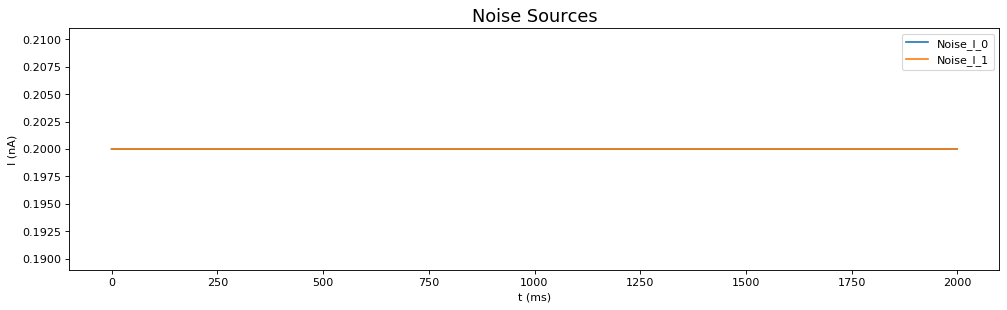

Plasticity


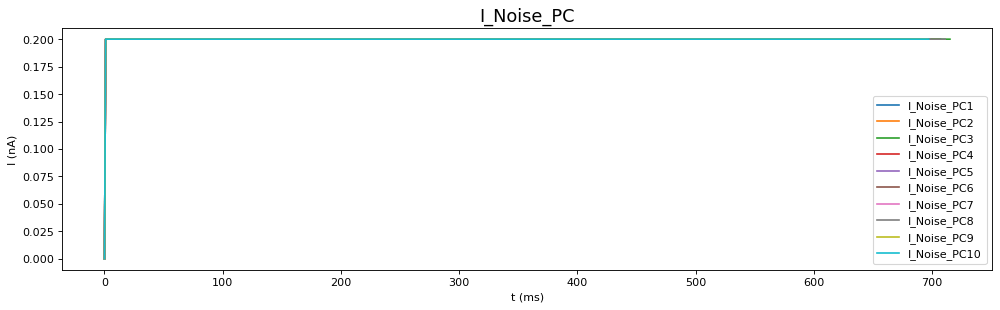

Plasticity Coupled Scenario


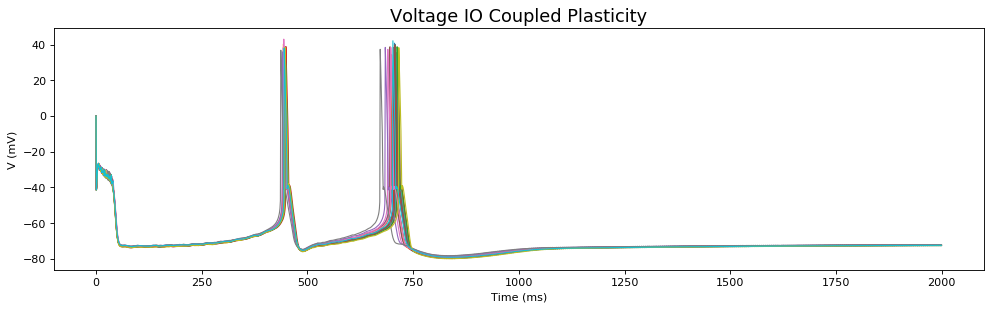

Number of spikes DCN: 282
Number of spikes DCN: 289
Number of spikes DCN: 280
Number of spikes DCN: 290
Number of spikes DCN: 282
Number of spikes DCN: 284
Number of spikes DCN: 296
Number of spikes DCN: 290
Number of spikes DCN: 276
Number of spikes DCN: 286


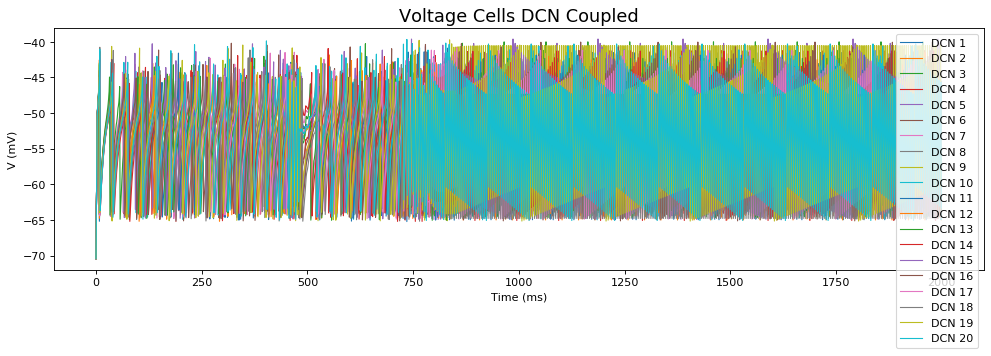

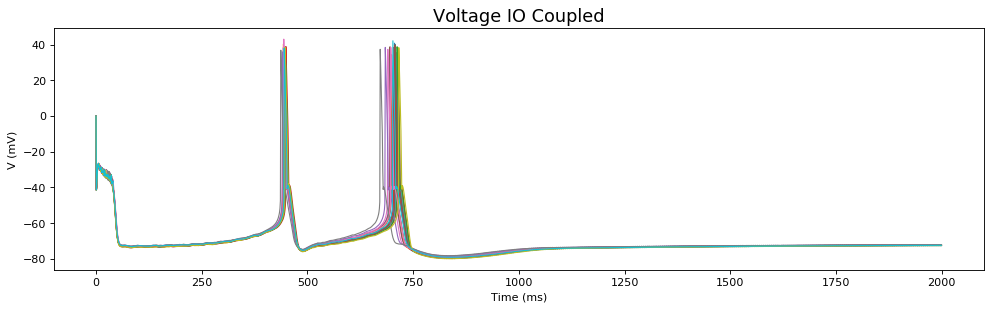

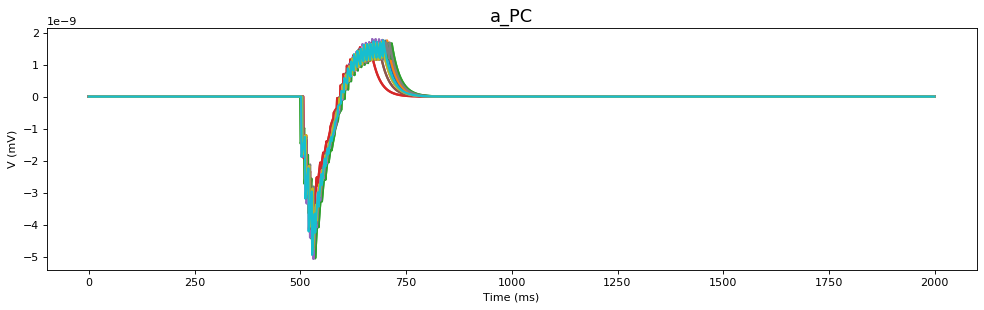

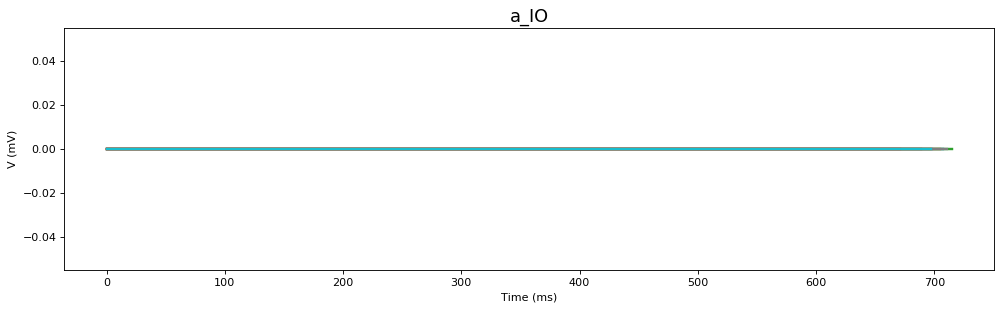

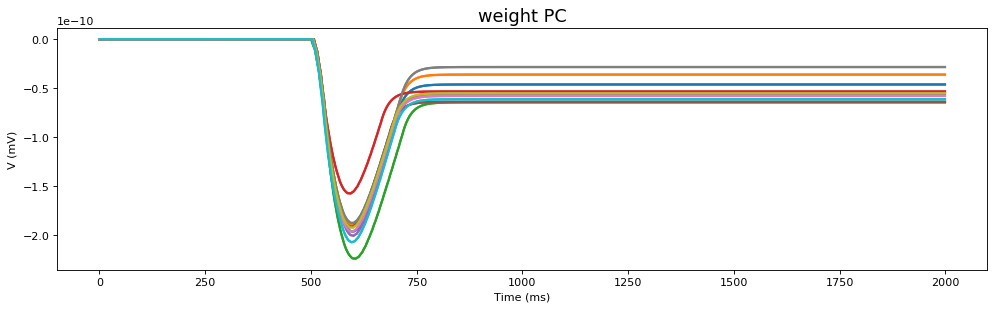

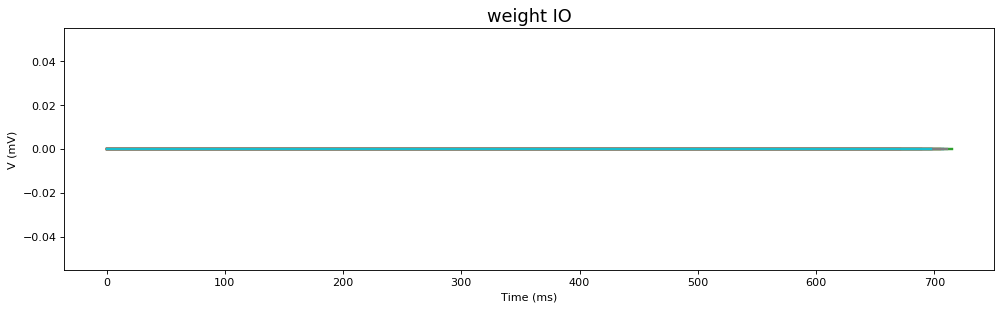

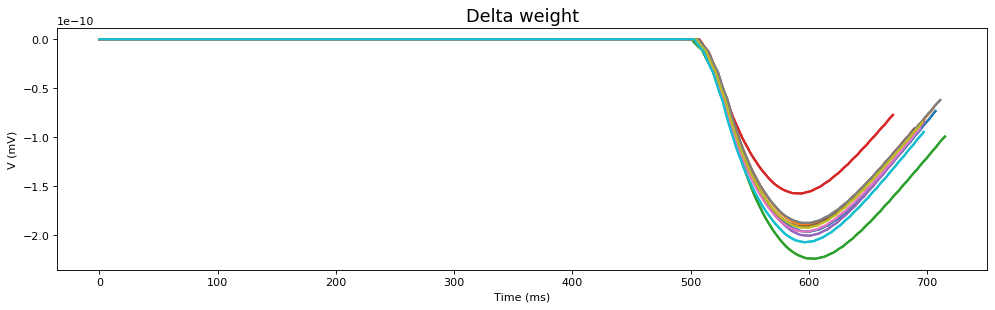

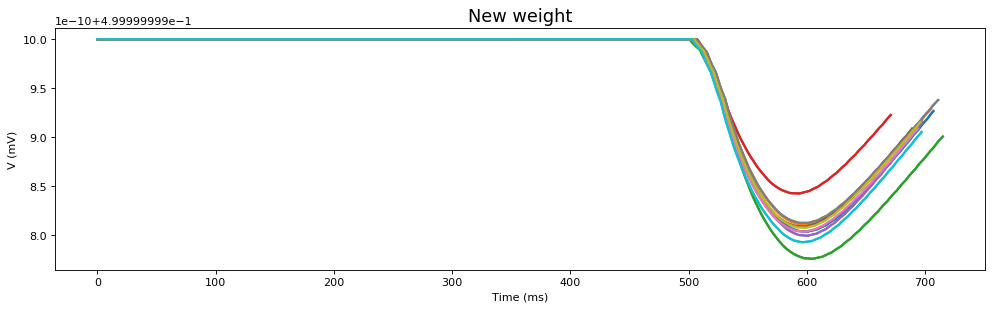

Plasticity Uncoupled Scenario


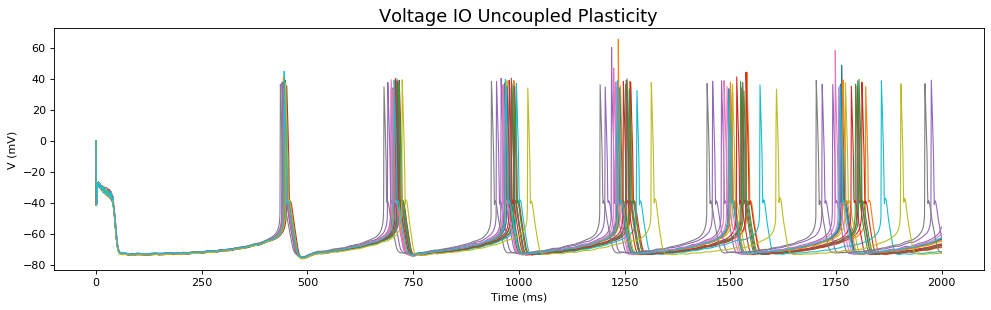

Number of spikes DCN: 64
Number of spikes DCN: 75
Number of spikes DCN: 65
Number of spikes DCN: 73
Number of spikes DCN: 66
Number of spikes DCN: 63
Number of spikes DCN: 82
Number of spikes DCN: 72
Number of spikes DCN: 63
Number of spikes DCN: 74


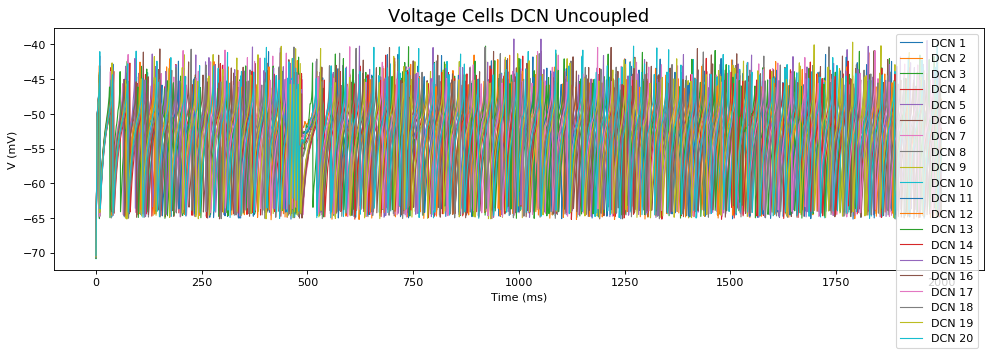

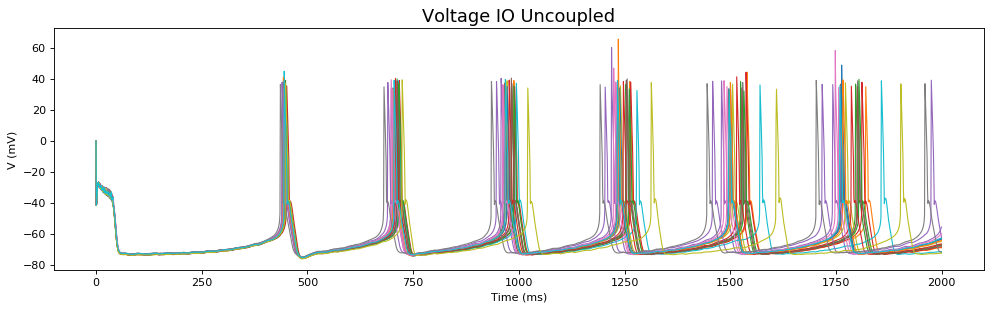

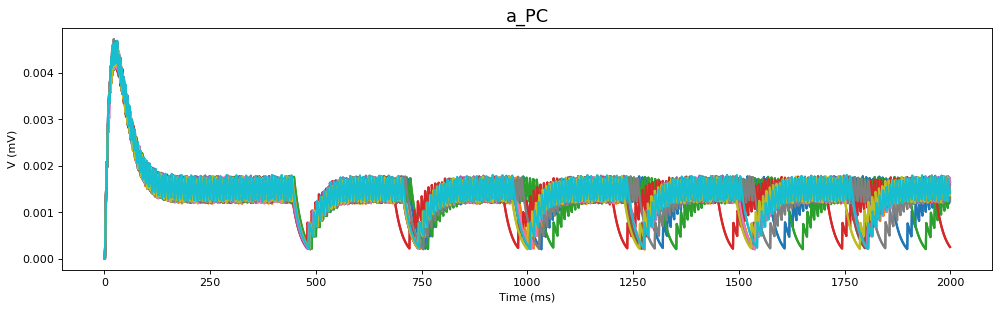

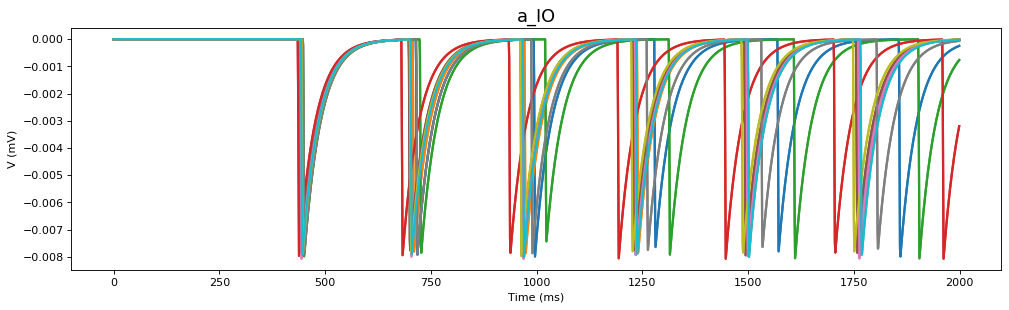

<Figure size 1200x320 with 0 Axes>

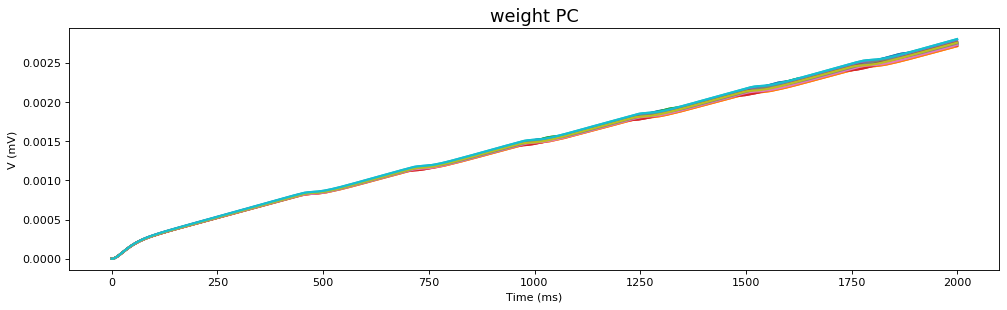

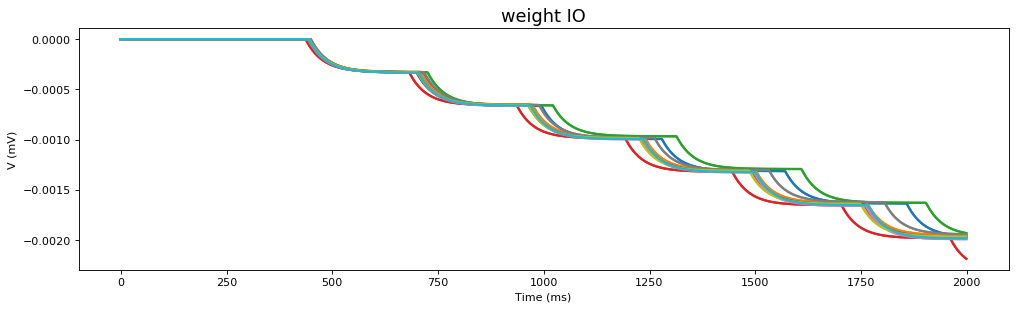

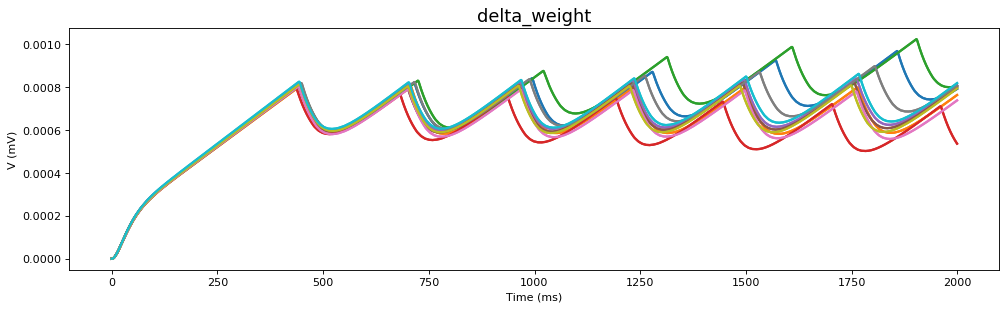

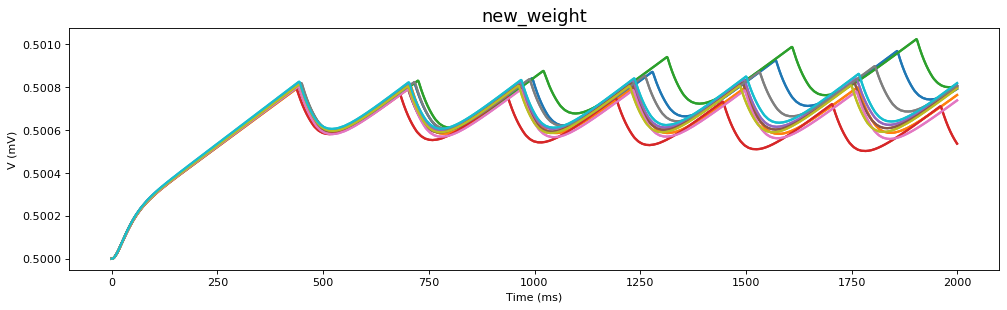

In [7]:
from G_Plot_Plasticity import *

In [8]:
from F_save_data_Plasticity import *

Plasticity variables are saved
Inputs are saved
Voltage Cells are saved
Spike Times are saved
population rates saved


In [9]:
x = np.empty((2,4))
print(x)

[[ 69.34722222  40.22222222 999.34722222  40.22222222]
 [ 69.34722222 281.82222222 999.34722222 281.82222222]]


In [10]:
#from G_Plot_Plasticity import *

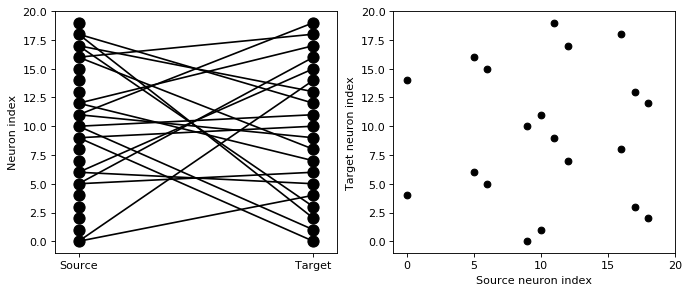

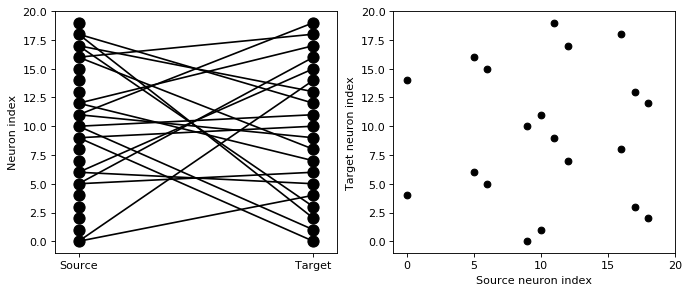

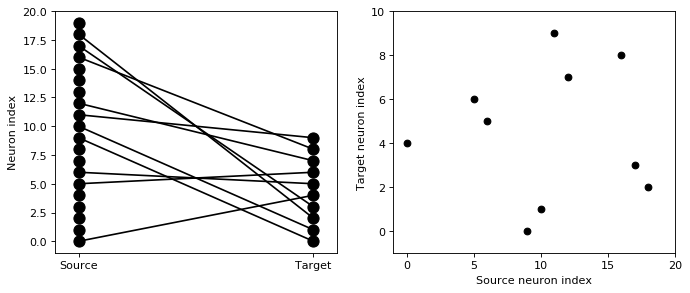

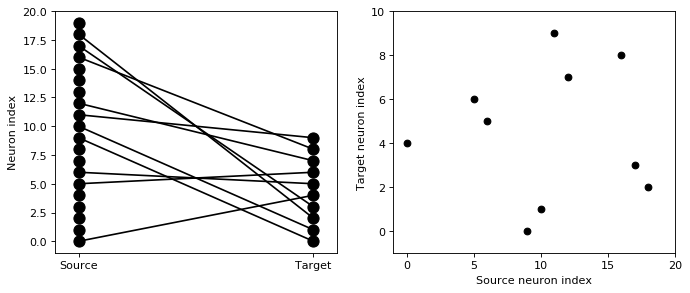

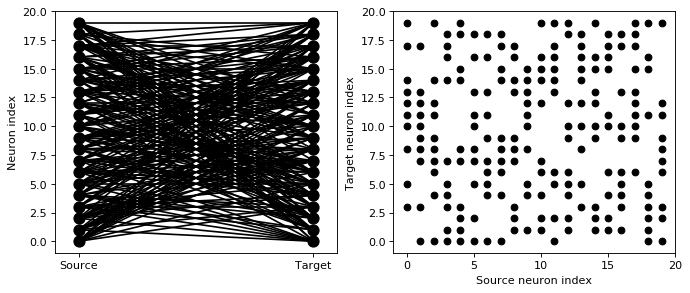

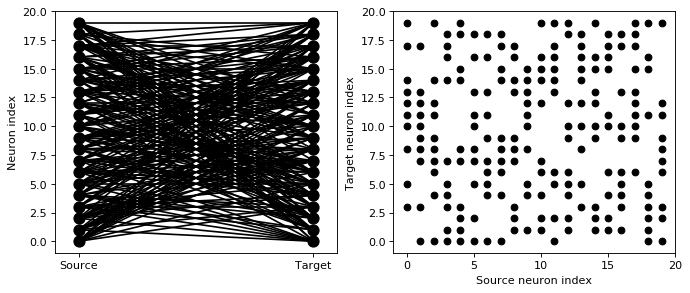

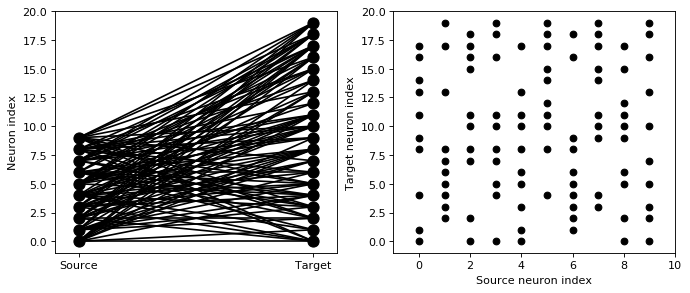

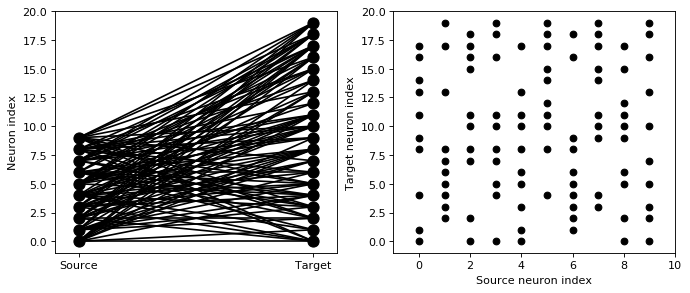

In [11]:
visualise(S_IO_N_Coupled)
visualise(S_IO_N_Uncoupled)

#visualise(Synapse_IO_PC_Coupled_noSTDP)
#visualise(Synapse_IO_PC_Uncoupled_noSTDP)
visualise(Synapse_IO_PC_Coupled_STDP)
visualise(Synapse_IO_PC_Uncoupled_STDP)

#visualise(IO_DCN_Synapse_Coupled_noSTDP)
#visualise(IO_DCN_Synapse_Uncoupled_noSTDP)
visualise(IO_DCN_Synapse_Coupled_STDP)
visualise(IO_DCN_Synapse_Uncoupled_STDP)

#visualise(DCN_PC_Synapse_Coupled_noSTDP)
#visualise(DCN_PC_Synapse_Uncoupled_noSTDP)
visualise(DCN_PC_Synapse_Coupled_STDP)
visualise(DCN_PC_Synapse_Uncoupled_STDP)

In [12]:
from F_save_data_Plasticity import *

<IPython.core.display.Javascript object>


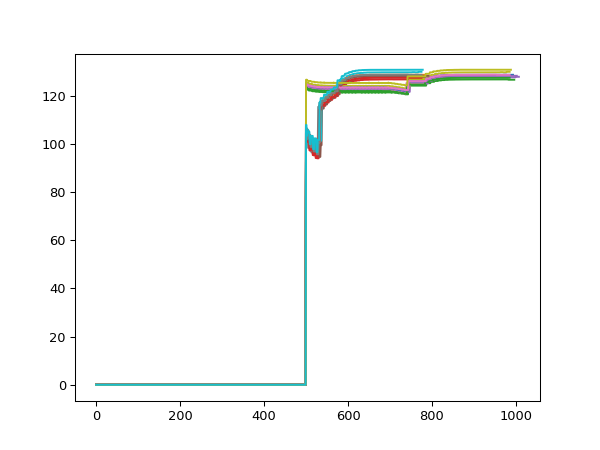

<IPython.core.display.Javascript object>


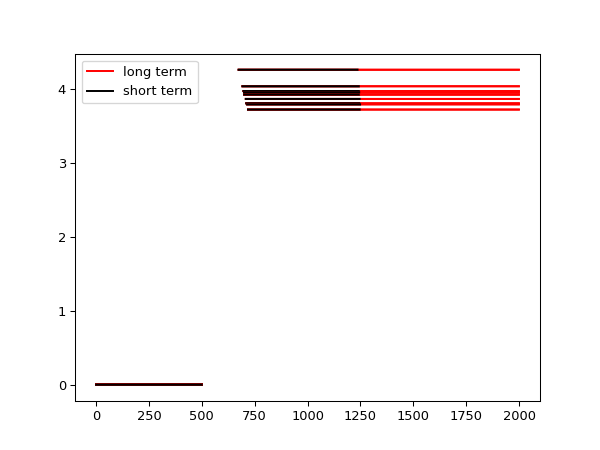

(20, 2000)


In [13]:
%matplotlib notebook

plt.figure()
for k in range(0,10):
    plt.plot(mon_N_PC_Coupled.f_lt_PC[k])
    plt.plot(mon_N_PC_Coupled.f_st_PC[k])

plt.show()
plt.figure()
for p in range(0,n_IO):
    plt.plot(mon_N_PC_Coupled.f_lt_IO[p],color='red')
    plt.plot(mon_N_PC_Coupled.f_st_IO[p], color='black')
plt.legend(['long term','short term'])
print(mon_N_PC_Coupled.f_lt_IO.shape)

In [14]:
A = 2*np.arange(10)
idx = (A>2)*(A<8)
print(idx)
15e-3*6

[False False  True  True False False False False False False]


0.09